# Plotting workspace comparing the effect of consensus/non-consensus in estimation and motion for the algorithm variations.

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from matplotlib import style
from matplotlib.lines import Line2D

import pickle as pkl

# Perfect Finish Rate

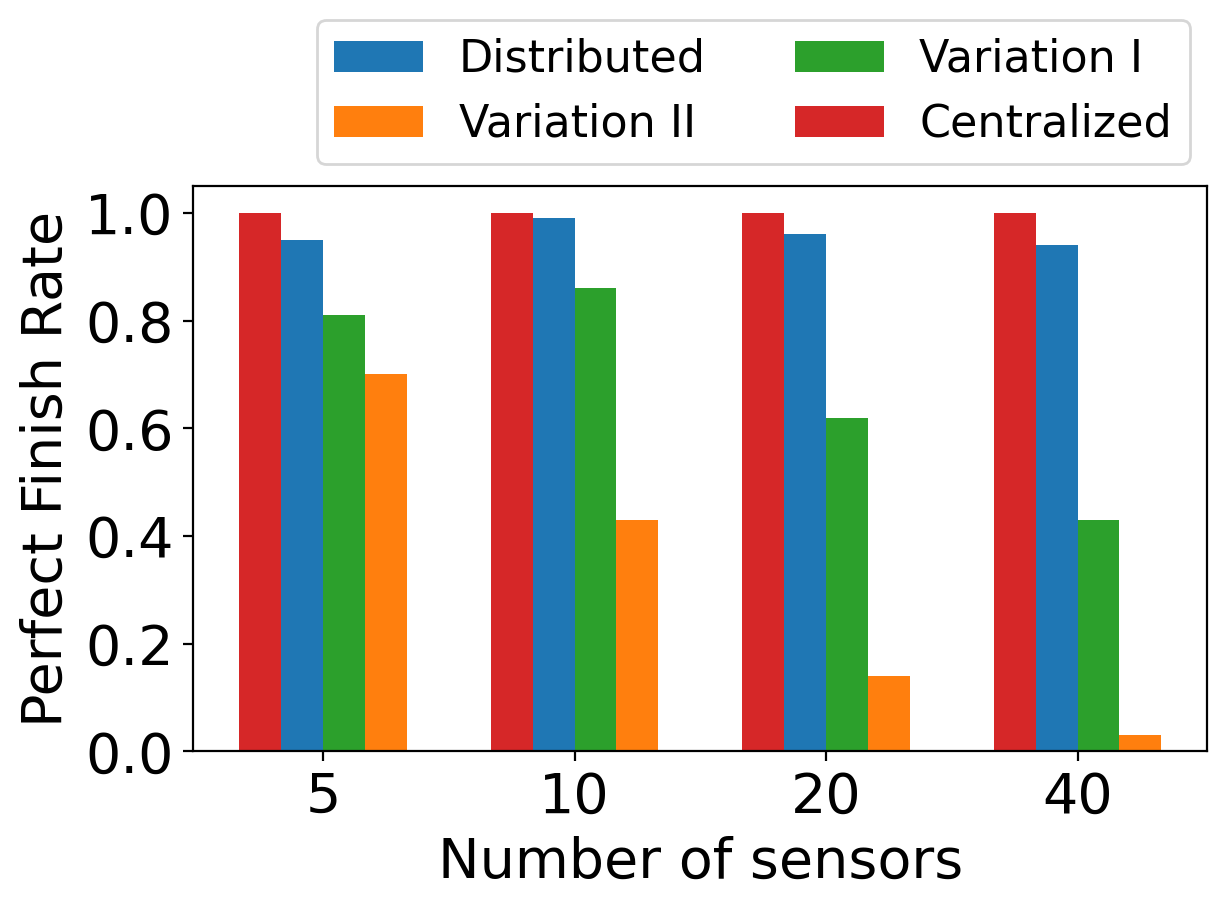

In [11]:
def perfect_finish_rate(d,eps=0.2):
    '''
        d: The data.
        eps: failure threshold.
    '''
    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    failure_rate = np.mean(np.any(dist[:,-1,:]>eps,axis=1))
    
    return 1-failure_rate

fr = []
for N_sen in [4,10,20,40]:
    
    
    with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
        central_data = pkl.load(file)
    
    
    with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(N_sen),'rb') as file:
        data = pkl.load(file)    
    
    
    data={**data,**central_data}
        
    pf ={}
    for key,item in data.items():
        pf[key]=perfect_finish_rate(item)
    fr.append(pf)
    
fr = {key:[f[key] for f in fr] for key in fr[1].keys()}


plt.figure(dpi=200)
label_map = {'Coord.+Consensus Est.':'Distributed',
          'No Coord.+Consensus Est.':'Variation I',
           'No Coord.+Local Est.':'Variation II',
             'centralized':'Centralized'
          }
ls = ['solid','dashed','dotted','dashdot']

width = 1


bar_offset = {
             'centralized':-1.5*width,
        'Coord.+Consensus Est.':-0.5*width,
          'No Coord.+Consensus Est.':0.5*width,
           'No Coord.+Local Est.':1.5*width,
          }

N_sens = [5,10,20,40]
locs = (np.array([1,2,3,4])+1.6)*6*width

for key,val in fr.items():
    plt.bar(locs+bar_offset[key],np.array(val),width=width,label=label_map[key])

fontsize = 20
plt.xlabel('Number of sensors',fontsize = fontsize)
plt.ylabel('Perfect Finish Rate',fontsize = fontsize)
plt.xticks(locs,N_sens,fontsize = fontsize)
plt.yticks(fontsize = fontsize)

legend_font = 16
plt.legend(ncol = 2,bbox_to_anchor = (0.1,1),fontsize = legend_font)
plt.tight_layout()
plt.savefig('../Figures/Success Rate/Perfect Finish.png')
plt.show()

# Success Rate

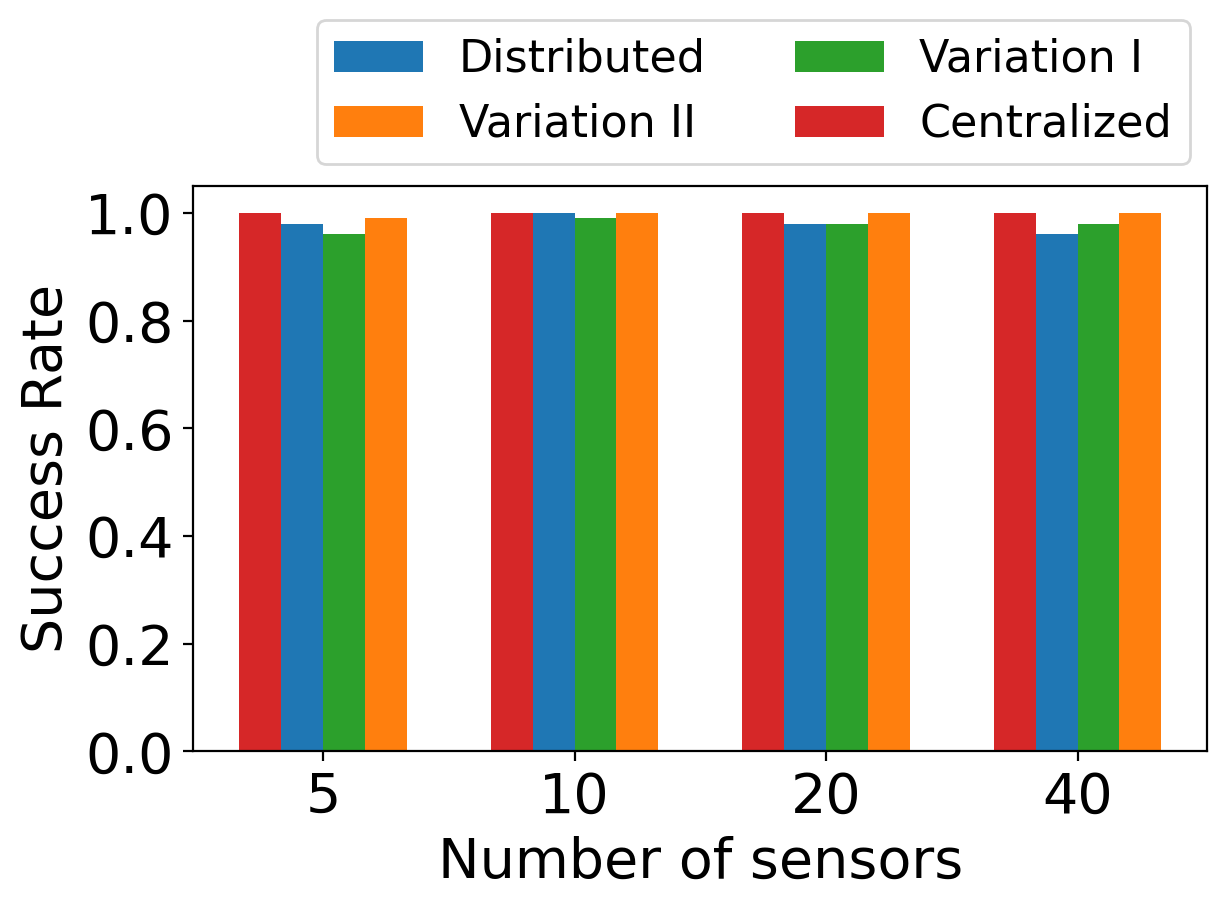

In [12]:
def success_rate(d,eps=0.2):
    '''
        d: The data.
        eps: failure threshold.
    '''
    ps = np.array(d['p'])
    q = np.array(d['q'])

    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    return np.mean(np.any(dist[:,-1,:]<eps,axis=1))

fr = []
for N_sen in [4,10,20,40]:
    
    
    with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
        central_data = pkl.load(file)
    
    
    with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(N_sen),'rb') as file:
        data = pkl.load(file)    
    
    
    data={**data,**central_data}
        
    pf ={}
    for key,item in data.items():
        pf[key]=success_rate(item)
    fr.append(pf)
    
fr = {key:[f[key] for f in fr] for key in fr[1].keys()}


plt.figure(dpi=200)
label_map = {'Coord.+Consensus Est.':'Distributed',
          'No Coord.+Consensus Est.':'Variation I',
           'No Coord.+Local Est.':'Variation II',
             'centralized':'Centralized'
          }
ls = ['solid','dashed','dotted','dashdot']

width = 1


bar_offset = {
             'centralized':-1.5*width,
        'Coord.+Consensus Est.':-0.5*width,
          'No Coord.+Consensus Est.':0.5*width,
           'No Coord.+Local Est.':1.5*width,
          }

N_sens = [5,10,20,40]
locs = (np.array([1,2,3,4])+1.6)*6*width

for key,val in fr.items():
    plt.bar(locs+bar_offset[key],np.array(val),width=width,label=label_map[key])


fontsize = 20
plt.xlabel('Number of sensors',fontsize = fontsize)
plt.ylabel('Success Rate',fontsize = fontsize)
plt.xticks(locs,N_sens,fontsize = fontsize)
plt.yticks(fontsize = fontsize)

legend_font = 16
plt.legend(ncol = 2,bbox_to_anchor = (0.1,1),fontsize = legend_font)
plt.tight_layout()

plt.savefig('../Figures/Success Rate/Success.png')
plt.show()

# Fraction of sensors reaching the source

In [137]:
def frac_source_reach(d,eps=0.2):
    '''
        d: The data.
        eps: failure threshold.
    '''
    ps = np.array(d['p'])
    
    q = np.array(d['q'])
    
    n = ps.shape[-2]
    
    dist = np.linalg.norm(ps-q[:,:,np.newaxis,:],axis=-1)

    return np.mean(np.sum(dist[:,-1,:]<eps,axis=1)/n)

In [138]:
fr = []
for N_sen in [4,10,20,40]:
    
    
    with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
        central_data = pkl.load(file)
    
    
    with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(N_sen),'rb') as file:
        data = pkl.load(file)    
    
    
    data={**data,**central_data}
        
    pf ={}
    for key,item in data.items():
        pf[key]=frac_source_reach(item)
    fr.append(pf)
    
fr = {key:[f[key] for f in fr] for key in fr[1].keys()}

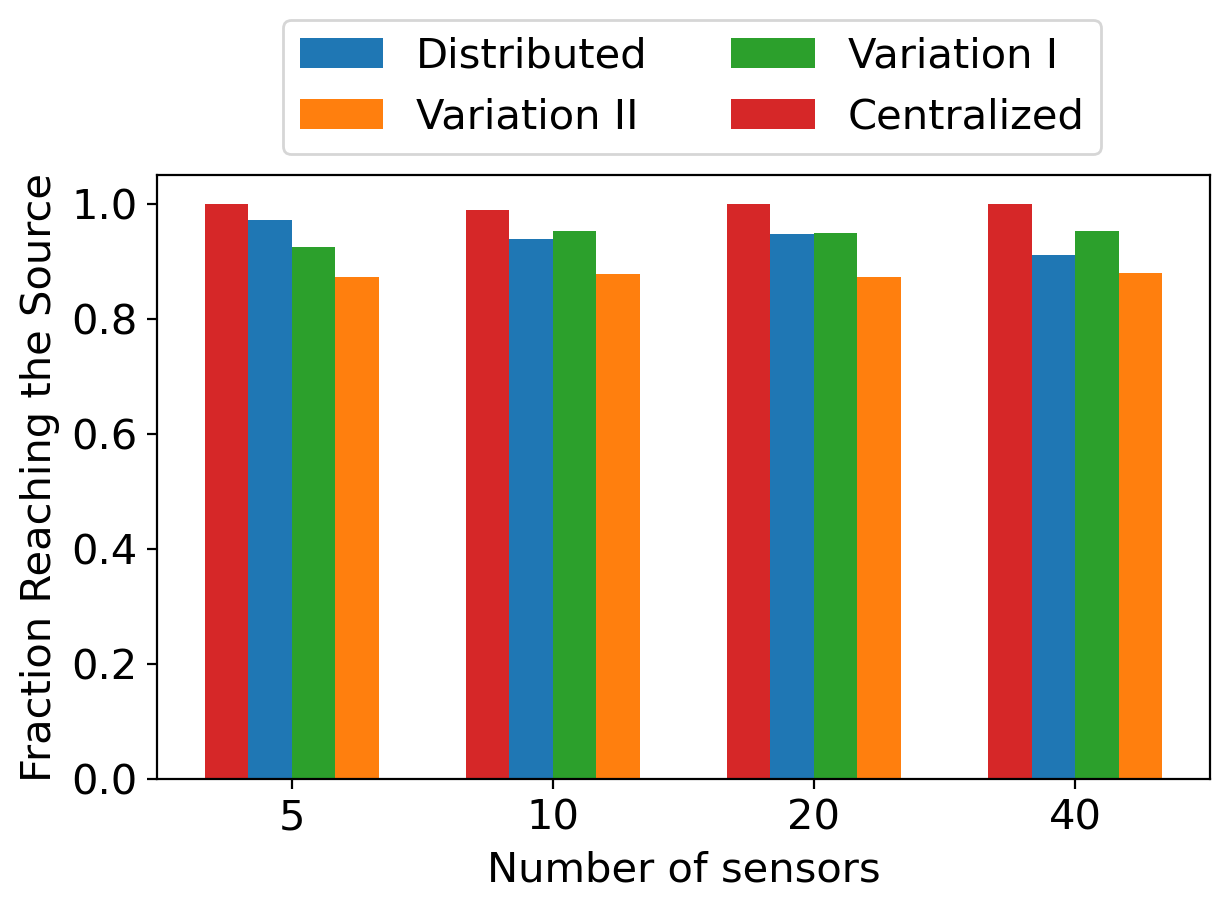

In [139]:

plt.rcParams['font.size'] = '15'
plt.figure(dpi=200)
label_map = {'Coord.+Consensus Est.':'Distributed',
          'No Coord.+Consensus Est.':'Variation I',
           'No Coord.+Local Est.':'Variation II',
             'centralized':'Centralized'
          }
ls = ['solid','dashed','dotted','dashdot']

width = 1


bar_offset = {
             'centralized':-1.5*width,
        'Coord.+Consensus Est.':-0.5*width,
          'No Coord.+Consensus Est.':0.5*width,
           'No Coord.+Local Est.':1.5*width,
          }

N_sens = [5,10,20,40]
locs = (np.array([1,2,3,4])+1.6)*6*width

# plt.boxplot( [val[-1] for key,val in fr.items()], \
#         positions = locs, widths= width,\
#        )

for key,val in fr.items():
    plt.bar(locs+bar_offset[key],np.array(val),width=width,label=label_map[key])

plt.xlabel('Number of sensors')
plt.ylabel('Fraction Reaching the Source')
plt.xticks(locs,N_sens)
plt.legend(ncol = 2,bbox_to_anchor = (0.1,1))
plt.tight_layout()
plt.show()